# Imports

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Import data

In [2]:
def get_filenames(origin,dimension,simmetry,score, extension):
    origins = {'-r':'RTGA','-g':'GAN','-m':'MATLAB'}    
    if os.getcwd().split('\\')[2] == 'lucas':
        if origins in ['-r','-m']:
            freq_filename = 'E:/Lucas GAN/Dados/7- Perfomance_data/%sD/freqs/RTGA/%s/%s.%s'%(dimension,simmetry,score,extension)
            best_geom_filename = 'E:/Lucas GAN/Dados/7- Perfomance_data/%sD/best_geom/RTGA/%s/%s.%s'%(dimension,simmetry,score,extension)
        else:
            freq_filename = 'E:/Lucas GAN/Dados/7- Perfomance_data/%sD/freqs/GAN/%s/%s.%s'%(dimension,simmetry,score,extension)
            best_geom_filename = 'E:/Lucas GAN/Dados/7- Perfomance_data/%sD/best_geom/GAN/%s/%s.%s'%(dimension,simmetry,score,extension)
        score_filename = 'E:/Lucas GAN/Dados/4- Mechanical_scores/%s/%sD/%s/%s.csv' %(origins[origin],dimension,simmetry,score)
        hist_filename = 'E:/Lucas GAN/Dados/7- Perfomance_data/%sD/hists/%s/hist'%(dimension, simmetry)
    else:
        if origins in ['-r','-m']:
            freq_filename = 'D:/Lucas GAN/Dados/7- Perfomance_data/%sD/freqs/RTGA/%s/%s.%s'%(dimension,origins[origin],simmetry,score,extension)
            best_geom_filename = 'D:/Lucas GAN/Dados/7- Perfomance_data/%sD/best_geom/RTGA/%s/%s.%s'%(dimension,simmetry,score,extension)
        else:
            freq_filename = 'D:/Lucas GAN/Dados/7- Perfomance_data/%sD/freqs/GAN/%s/%s.%s'%(dimension,simmetry,score,extension)
            best_geom_filename = 'D:/Lucas GAN/Dados/7- Perfomance_data/%sD/best_geom/GAN/%s/%s.%s'%(dimension,simmetry,score,extension)
            
        score_filename = 'D:/Lucas GAN/Dados/4- Mechanical_scores/%s/%sD/%s/%s.csv' %(origins[origin],dimension,simmetry,score)
        hist_filename = 'D:/Lucas GAN/Dados/7- Perfomance_data/%sD/hists/%s/hist'%(dimension, simmetry)

    return freq_filename,best_geom_filename,score_filename,hist_filename
origins = {'-r':'RTGA','-g':'GAN','-m':'MATLAB'}

## Frequency of best geometries

Model: 1


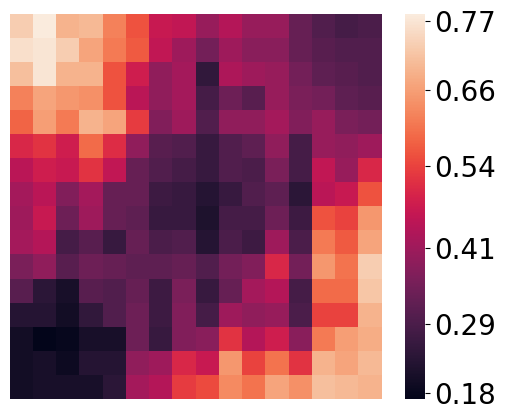

Model: 2


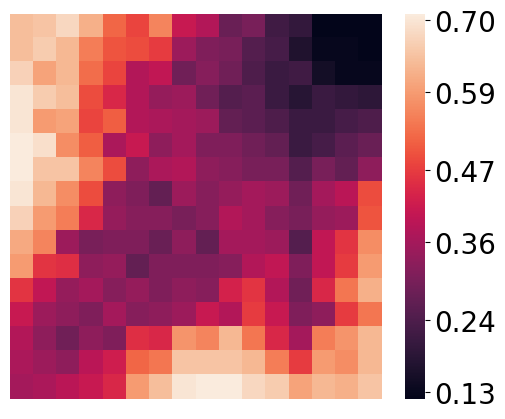

Model: 3


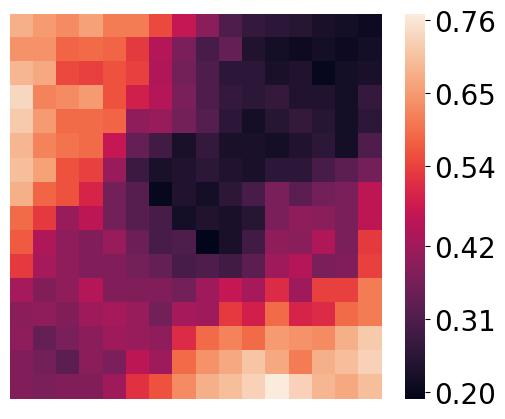

Model: 4


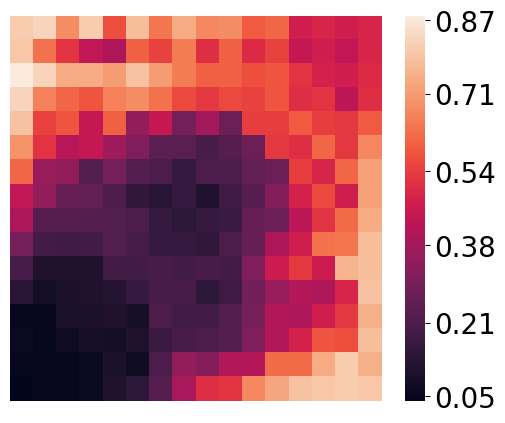

Model: 5


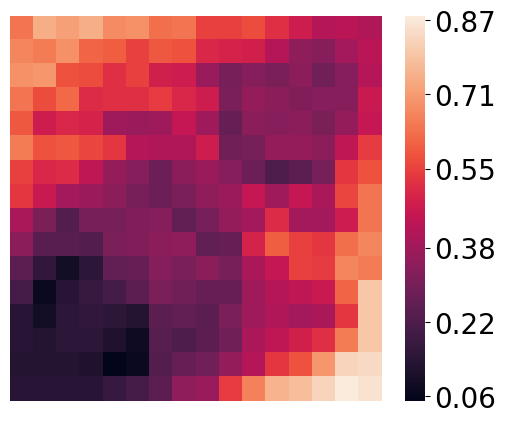

Model: 6


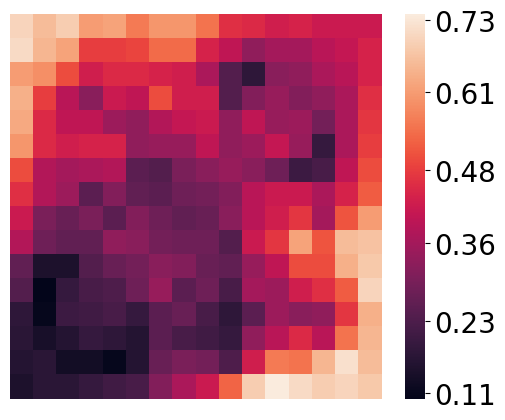

Model: 7


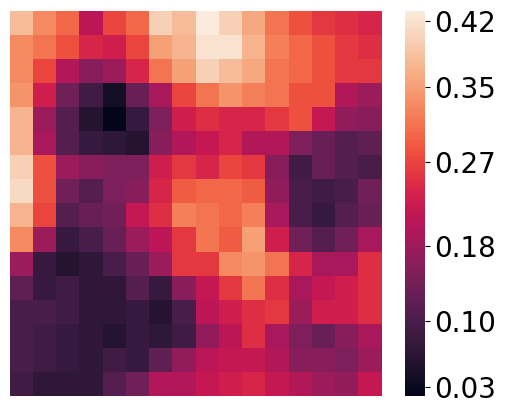

Model: 8


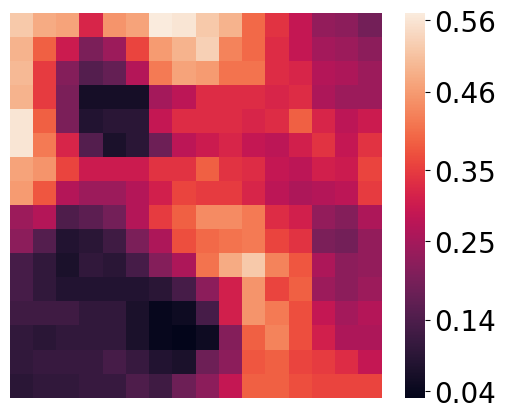

Model: 9


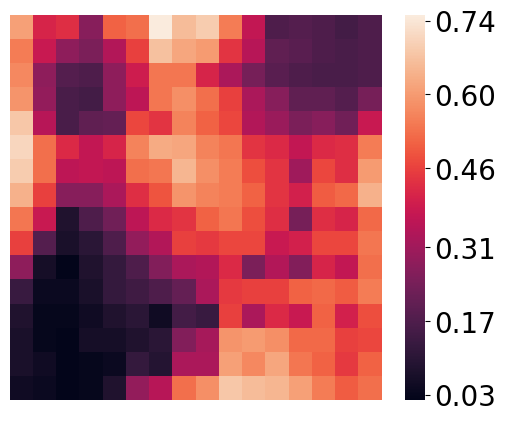

Model: 10


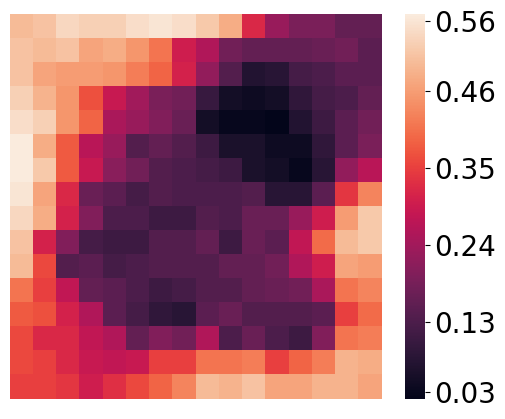

Model: 11


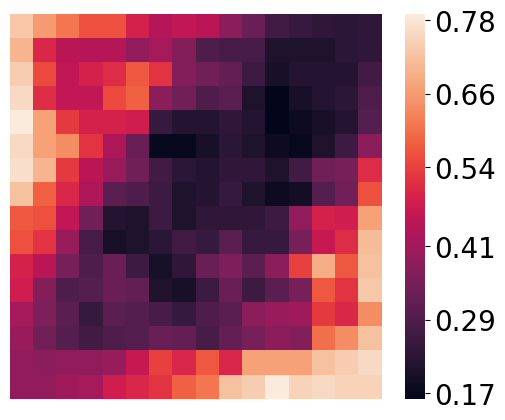

Model: 12


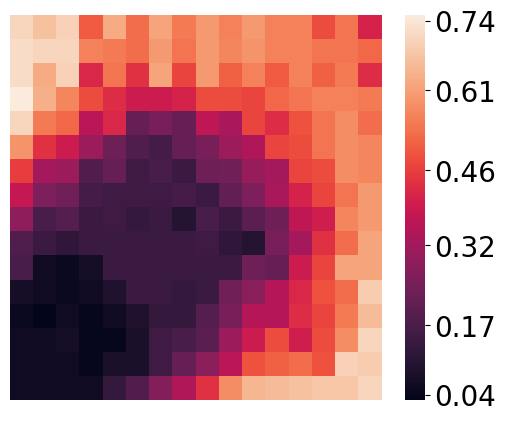

Model: 13


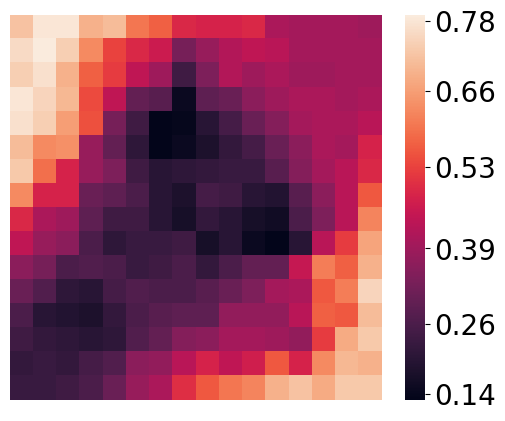

In [3]:
def show(data, figsize, fontsize,showticks, showbar, cmap,fname=None,extension='png',save=False, show=False):
    fig = plt.figure(frameon=False,figsize=figsize)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    g = sns.heatmap(data,xticklabels=showticks, yticklabels=showticks, cbar=showbar, cmap=cmap, vmin= data.max(),vmax = data.min(),linewidths=0,annot=False)
    cbar = g.collections[0].colorbar
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    ticks = [np.round(data.min()+(data.max()-data.min())*float(i)/5.0,2) for i in range(6)]
    ticks[0]+=0.01
    ticks[-1]-=0.01
    cbar.set_ticks(ticks)
    if show:
        plt.show()
    if save:
        plt.savefig(fname, format=extension, dpi = 1200)
dimension = '2'
origin = '-g'
score = 'isotropy'
simmetry = 'p4m'
extension = 'svg'

fontsize = 25
figsize = (6,5)

freq_filename,_,score_filename,_ = get_filenames(origin, dimension, simmetry, score, extension)
data = np.loadtxt(score_filename,delimiter=',')
top = 100
if origin == "-g":
    models = np.unique(data[:,1])
    for model in models:
        model_data = data[np.where(data[:,1]==model)[0]]
        order = np.argsort(model_data[:,-1])[-top:]
        top_data = model_data[order]

        geoms = top_data[:,2:-1]
        idxs = top_data[:,0]

        freq_geom = []
        for i in range(len(geoms[0])):
            freq_geom.append(geoms[:,i].sum())

        freq_geom = np.array(freq_geom)/top
        freq_geom = freq_geom.reshape((int(len(freq_geom)**0.5),int(len(freq_geom)**0.5)))
        print('Model: %d'%model)
        show(freq_geom,figsize,fontsize, False,True,'rocket',freq_filename,extension,save=False,show=True)

if origin == "-r":
    order = np.argsort(data[:,-1])[-top:]
    top_data = data[order]

    geoms = top_data[:,1:-1]
    idxs = top_data[:,0]

    freq_geom = []
    for i in range(len(geoms[0])):
        freq_geom.append(geoms[:,i].sum())

    freq_geom = np.array(freq_geom)/top
    freq_geom = freq_geom.reshape((int(len(freq_geom)**0.5),int(len(freq_geom)**0.5)))
    show(freq_geom,figsize,fontsize, False,True,'rocket',freq_filename,extension,save=False,show=True)

# Visualize best geometries

> isotropy idx: 853. model: 9 score: 0.9997. porosity: 0.5547


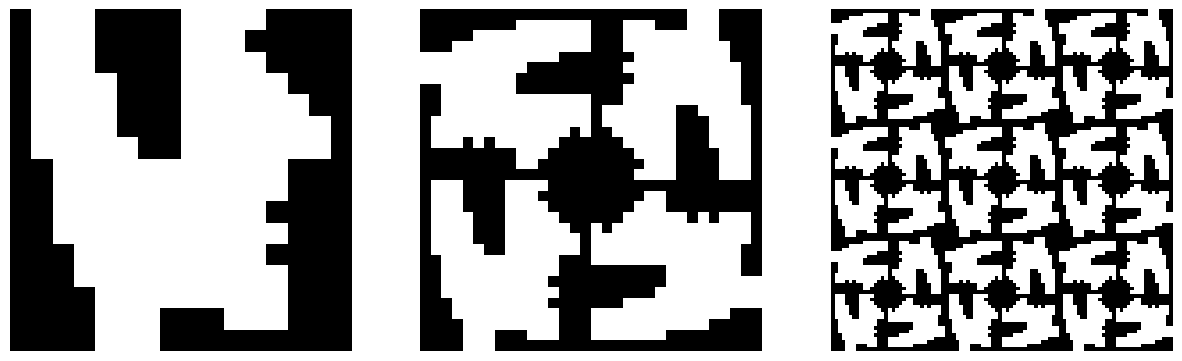

> isotropy idx: 523. model: 6 score: 0.9997. porosity: 0.5547


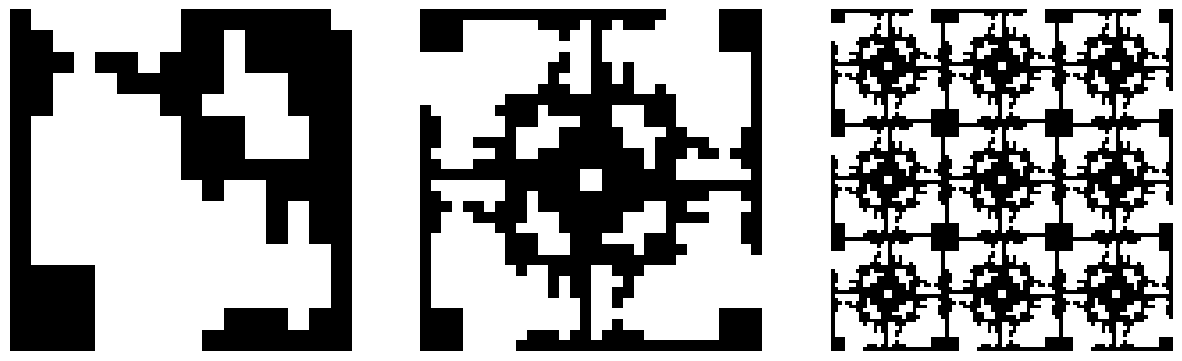

> isotropy idx: 891. model: 9 score: 0.9996. porosity: 0.5391


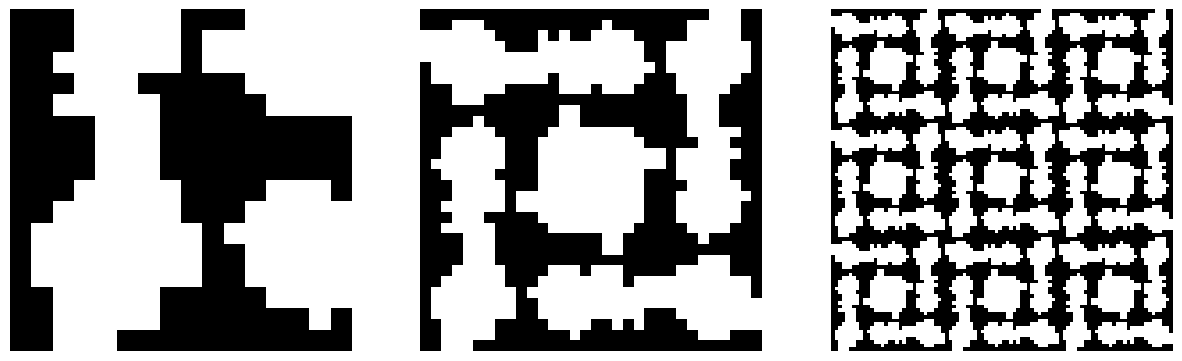

> isotropy idx: 618. model: 7 score: 0.9996. porosity: 0.5430


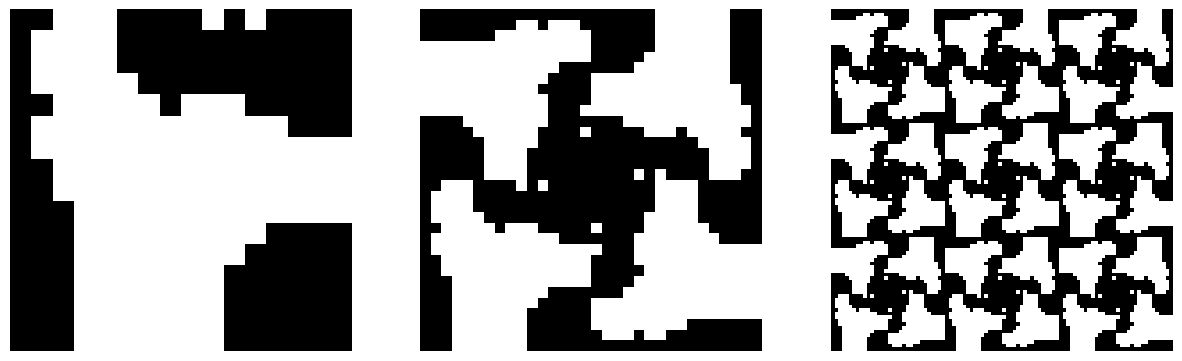

> isotropy idx: 1083. model: 11 score: 0.9976. porosity: 0.5430


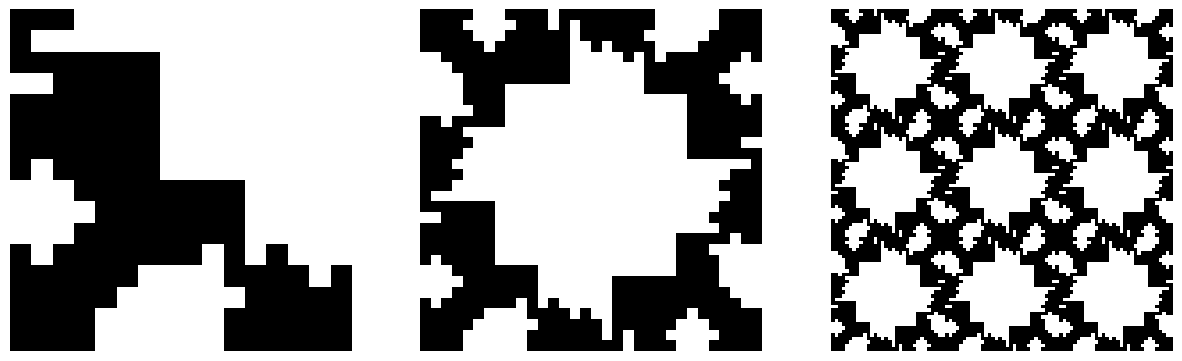

> isotropy idx: 904. model: 10 score: 0.9975. porosity: 0.5625


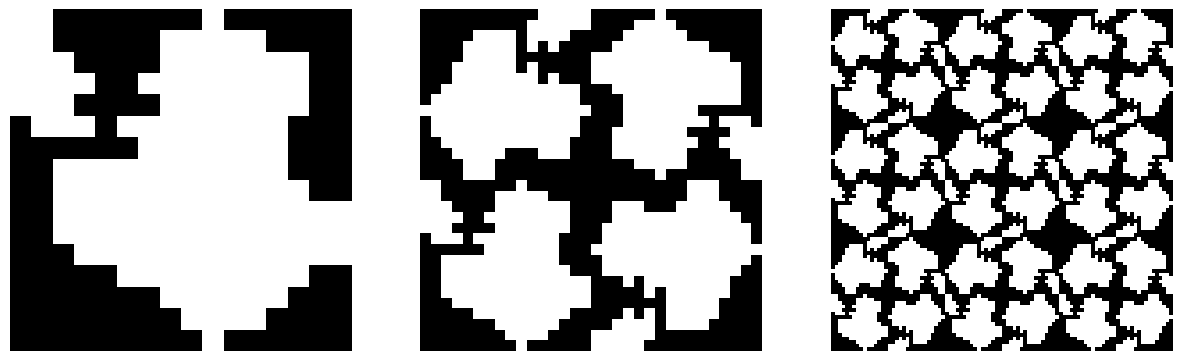

> isotropy idx: 980. model: 10 score: 0.9967. porosity: 0.5352


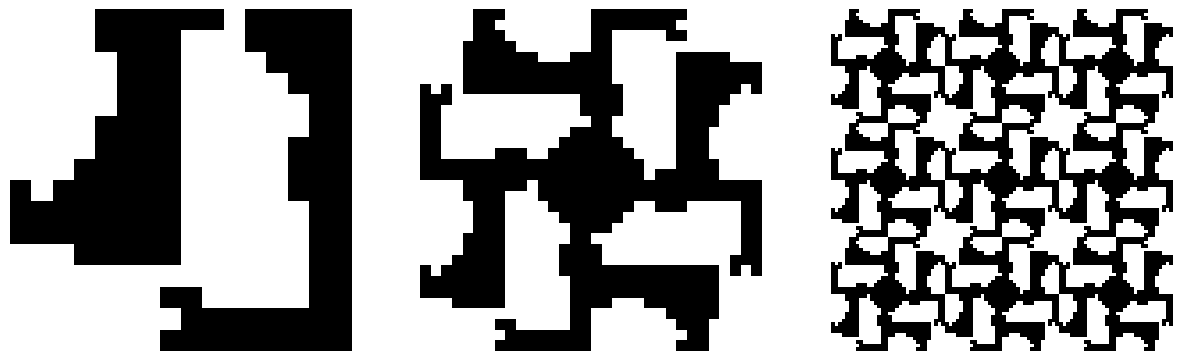

> isotropy idx: 824. model: 9 score: 0.9963. porosity: 0.5469


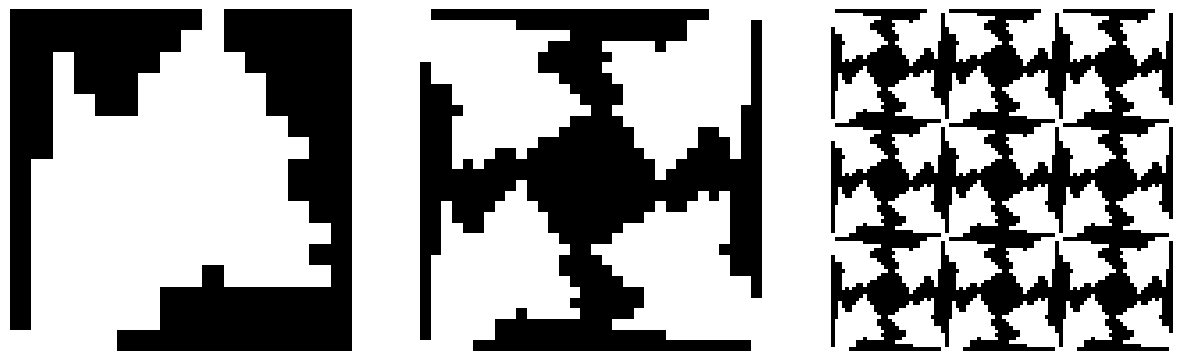

> isotropy idx: 900. model: 9 score: 0.9960. porosity: 0.5391


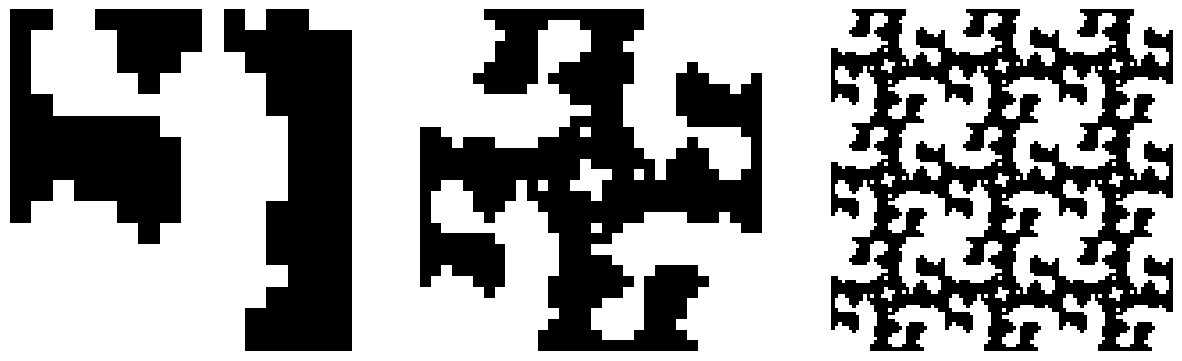

> isotropy idx: 1127. model: 12 score: 0.9952. porosity: 0.5508


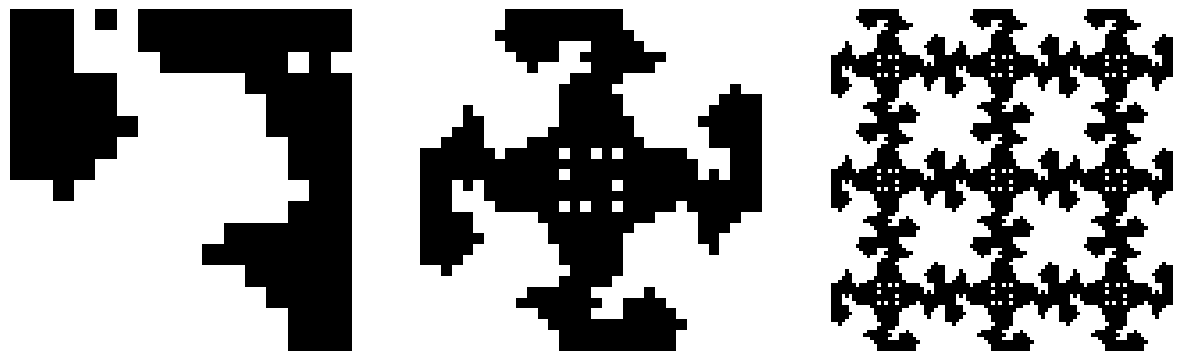

In [4]:
origin = '-g'
simmetry = 'p4m'
# scores = ['isotropy','hs']
scores = ['isotropy']
extension = 'svg'
top = 10

def create_unit(element,size,simmetry):
  if simmetry[1:] in ['4','4m']:
    unit_size = 2*size
    # fold_size = np.random.choice(4,1)[0]
    unit = np.ones((2*size,2*size))*(-1)
    h,w = element.shape
    for i in range(h):
      for j in range(w):
        el = element[i,j]
        
        j_ = [j,size-1-i,2*size-1-j,i+size]
        i_ = [i+size,j,size-1-i,2*size-1-j]
        # (1,7)->(7,14)->(14,8)->(8,1)
        for (k,l) in list(zip(i_,j_)):
          unit[k,l]  = el

  return unit

def create_arrange(unit,rows,cols):
  size = unit.shape[0]
  arrange = np.zeros((rows*size,cols*size))
  for i in range(unit.shape[0]):
    for j in range(unit.shape[1]):
      for row in range(rows):
        for col in range(cols):
          arrange[j+row*size,i+col*size] = unit[j,i]
  
  return arrange

def get_porosity(origin, simmetry, score, idx):
  if origin == "-g":
    if os.getcwd().split('\\')[2] == 'lucas':
      arrays_dir = "E:/Lucas GAN/Dados/1- Arranged_geometries/GAN/%s/%s/" % (simmetry, score)
    else:
      arrays_dir = "D:/Lucas GAN/Dados/1- Arranged_geometries/GAN/%s/%s/" % (simmetry, score)
      
  else:
    if os.getcwd().split('\\')[2] == 'lucas':
      arrays_dir = "E:/Lucas GAN/Dados/1- Arranged_geometries/RTGA/%s/" % simmetry
    else:
      arrays_dir = "D:/Lucas GAN/Dados/1- Arranged_geometries/RTGA/%s/" % simmetry

  arrays_filename = os.listdir(arrays_dir)
  array_filename = arrays_filename[int(idx)-1]
  if origin == "-g":
    porosity = np.round(float(array_filename.split('_')[4][:-4]),4)
  
  if origin == "-r":
    porosity = np.round(float(array_filename.split('_')[-1][:-4]),4)
  return porosity

def plot_geom(elem,best_geom_filename):
  elem = elem.reshape((int(len(elem)**0.5),int(len(elem)**0.5)))
  fig = plt.figure()
  plt.imshow(elem,cmap='Greys');
  plt.axis('off')
  plt.savefig(best_geom_filename,format=extension, dpi = 1200, bbox_inches='tight')
  plt.close(fig)

  fig,ax = plt.subplots(1,3);
  fig.set_size_inches((15,5))
  ax[0].imshow(elem,cmap='Greys');
  ax[0].axis('off')

  unit = create_unit(elem, elem.shape[0], simmetry)
  ax[1].imshow(unit,cmap='Greys');
  ax[1].axis('off')
  
  geom = create_arrange(unit, 3, 3)
  ax[2].imshow(geom,cmap='Greys');
  ax[2].axis('off')
  plt.show()

for score in scores:
    freq_filename,best_geom_filename,score_filename,_ = get_filenames(origin, dimension, simmetry, score, extension)
    data = np.loadtxt(score_filename,delimiter=',')
    order = np.argsort(-data[:,-1])[:top]
    top_data = data[order]
    idxs_top = top_data[:,0]
    if origin == '-g':
      models_top = top_data[:,1]

      for i in range(top):
          elem = top_data[i,2:-1]
          idx_geom = idxs_top[i] 
          model_geom = models_top[i]
          score_geom = np.round(top_data[i,-1],4)
          porosity_geom = get_porosity(origin, simmetry, score, idx_geom)
          print("> %s idx: %d. model: %d score: %.4f. porosity: %.4f"%(score, idx_geom, model_geom, score_geom, porosity_geom))
          plot_geom(elem,best_geom_filename)

    if origin == '-r':
      for i in range(top):
        elem = top_data[i,1:-1]
        idx_geom = idxs_top[i]
        score_geom = np.round(top_data[i,-1],4)
        porosity_geom = get_porosity(origin, simmetry, score, idx_geom)
        print("> %s idx: %d. score: %.4f. porosity: %.4f"%(score, idx_geom, score_geom, porosity_geom))
        plot_geom(elem,best_geom_filename)

## Visualize RTGA scores simulated in Sfepy

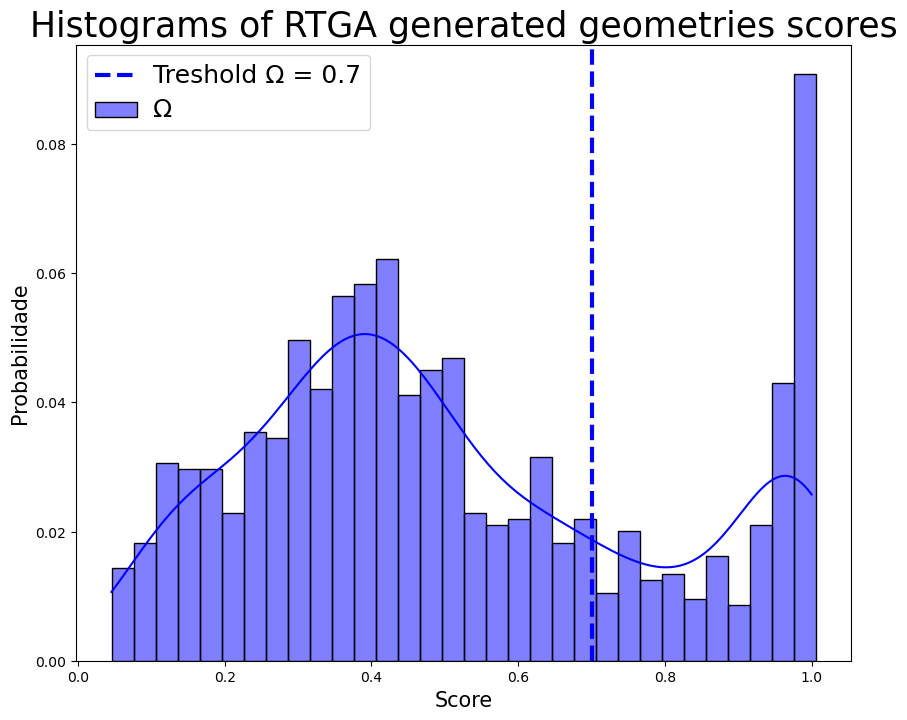

In [5]:
simmetry = 'p4m'
score = 'isotropy'
origin = '-g'

_,_,score_filename,hist_filename = get_filenames(origin, dimension, simmetry, score, extension)
data = np.loadtxt(score_filename,delimiter=',')   

hist_filename += '_' + score + '_RTGA.'+extension
fig = plt.figure(frameon=False,figsize=(10,8))
cutoffs = {'isotropy':0.7,'hs':0.65}
labels = {'isotropy':'Ω','hs':'HS'}
cutoff_labels = {'isotropy':'Treshold Ω = %s'%cutoffs[score],'hs':'Treshold HS = %s'%cutoffs[score]}
color = 'b'
score_data = data[:,-1].ravel()
plt.title('Histograms of RTGA generated geometries scores',fontsize=25)
plt.xlabel("Score",size=15)
plt.ylabel("Probabilidade",size=15)
g = sns.histplot(score_data,kde=True,stat='probability',legend=True,label=labels[score],binwidth=0.03,color=color)
plt.axvline(cutoffs[score], 0,score_data.max(), color=color, ls='--',label=cutoff_labels[score],linewidth=3)

plt.legend(prop={'size':15})
plt.setp(g.get_legend().get_texts(), fontsize=18)
plt.savefig(hist_filename)

## Visualize RTGA scores simulated in MATLAB

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/lucas/OneDrive/Documentos/GitHub/INT/Manufatura Aditiva/Simulacao-GAN/Pipeline/3- Machine_learning/Analyse/data/2D/hists/p4/hist_isotropy_MATLAB.png'

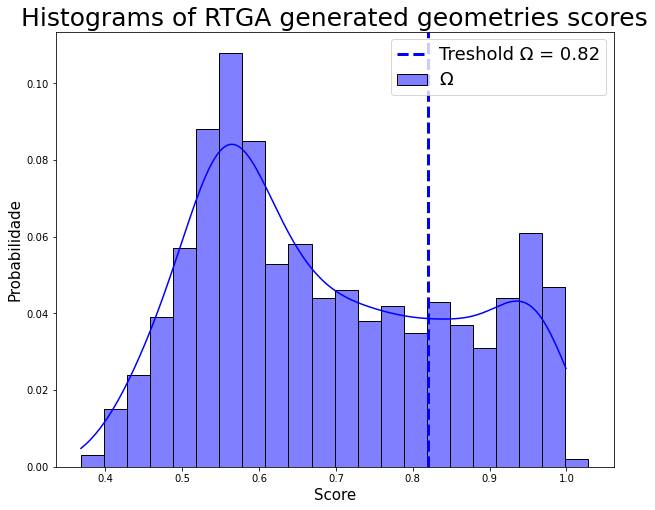

In [20]:
scores = ['isotropy']
try:
    score_m = 'E:/Lucas GAN/Dados/4- Mechanical_scores/MATLAB/%sD/%s/isotropy.csv' %(dimension,simmetry)
    data_iso = np.loadtxt(score_m,delimiter=',')   
except:
    pass
try:
    score_m = 'E:/Lucas GAN/Dados/4- Mechanical_scores/MATLAB/%sD/%s/hs.csv' %(dimension,simmetry)
    data_hs = np.loadtxt(score_m,delimiter=',')   
except:
    pass

datas = []
colors = []
hist_filename = 'C:/Users/lucas/OneDrive/Documentos/GitHub/INT/Manufatura Aditiva/Simulacao-GAN/Pipeline/3- Machine_learning/Analyse/data/%sD/hists/%s/hist'%(dimension, simmetry)

for score in scores:
    hist_filename += '_' + score
    if score == 'isotropy':
        datas.append(data_iso)
        colors.append('b')
        colors.append('b')
    if score == 'hs':
        datas.append(data_hs)
        colors.append('g')
        colors.append('g')

hist_filename += '_MATLAB.png'
fig = plt.figure(frameon=False,figsize=(10,8))
i = 0
cutoffs = [0.82,0.65]
labels = ['Ω','Treshold Ω = %s'%cutoffs[0],'HS','Treshold HS = %s'%cutoffs[1]]

for data_ in datas:
    score = data_[:,-1].ravel()
    # scaler = MinMaxScaler()
    # score = scaler.fit_transform(score.reshape((score.shape[0],1))).ravel()
    plt.title('Histograms of RTGA generated geometries scores',fontsize=25)
    plt.xlabel("Score",size=15)
    plt.ylabel("Probabilidade",size=15)
    g = sns.histplot(score,kde=True,stat='probability',legend=True,label=labels[2*i],binwidth=0.03,color=colors[2*i])
    plt.axvline(cutoffs[i], 0,score.max(), color=colors[2*i+1], ls='--',label=labels[2*i+1],linewidth=3)
    i += 1

plt.legend(prop={'size':15})
plt.setp(g.get_legend().get_texts(), fontsize=18)
plt.savefig(hist_filename)

## Comparing RTGA x GAN scores

(9762,)
(1046,)


c:\Users\lucas.barbosa\.conda\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
c:\Users\lucas.barbosa\.conda\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\lucas.barbosa\.conda\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
c:\Users\lucas.barbosa\.conda\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


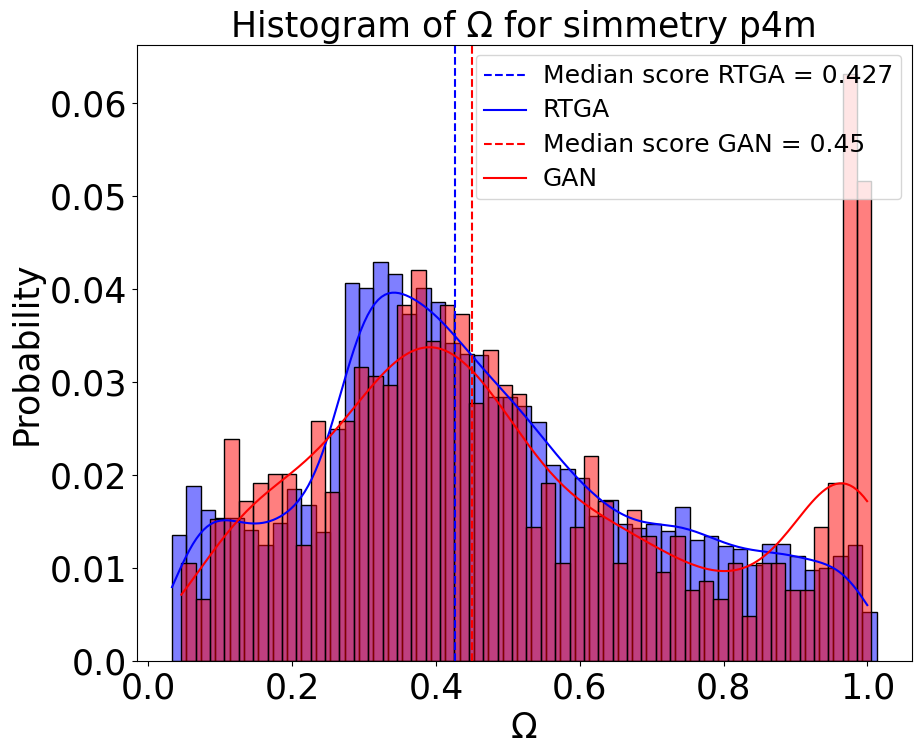

In [9]:
def hist(data,data_g,x_label,fname,extension,fontsize,figsize):
    datas = [data,data_g]
    colors = ['b','r']
    fig = plt.figure(frameon=False,figsize=figsize)
    median_scores = []
    for i in range(len(datas)):
        data_ = datas[i]
        score = data_[:,-1]
        print(score.shape)
        plt.title("Histogram of %s for simmetry %s"%(x_label,simmetry),fontsize=fontsize)
        plt.xlabel(x_label,fontsize=fontsize)
        plt.ylabel("Probability",fontsize=fontsize)
        median_score = np.round(np.median(score),3)
        median_scores.append(median_score)
        plt.axvline(median_score, 0,score.max(), color=colors[i], ls='--')
        g = sns.histplot(score,kde=True,stat='probability',binwidth=0.02,legend=True,color=colors[i])
        g.set_xticklabels(np.round(g.get_xticks(),1), size = fontsize)
        g.set_yticklabels(g.get_yticks(), size = fontsize)

    labels = ['Median score RTGA = %s'%median_scores[0],'RTGA', 'Median score GAN = %s'%median_scores[1],'GAN']
    plt.legend(labels=labels,prop={'size':15})
    plt.setp(g.get_legend().get_texts(), fontsize=fontsize-7)
    # plt.savefig(fname, format=extension, dpi=1200, bbox_inches='tight')
    plt.show()
    # print("Wasserstein distance: %.4f"%(wasserstein_distance(data[:,-1],data_g[:,-1])))

score = 'isotropy'
simmetry = 'p4m'
extension = 'svg'

score_r = 'D:/Lucas GAN/Dados/4- Mechanical_scores/RTGA/%sD/%s/%s.csv' %(dimension,simmetry,score)
data_r = np.loadtxt(score_r,delimiter=',')   

score_g = 'D:/Lucas GAN/Dados/4- Mechanical_scores/GAN/%sD/%s/%s.csv' %(dimension,simmetry,score)
data_g = np.loadtxt(score_g,delimiter=',')   

hist_filename = 'C:/Users/lucas/OneDrive/Documentos/GitHub/INT/Manufatura Aditiva/Simulacao-GAN/Pipeline/3- Machine_learning/Analyse/data/%sD/hists/%s/hist_comparison_%s.%s'%(dimension, simmetry, score, extension)
fontsize = 25
figsize = (10,8)

x_labels = {'isotropy':'Ω','hs':'HS'}
 
hist(data_r,data_g,x_labels[score],hist_filename,extension,fontsize,figsize)

# Compare model performance

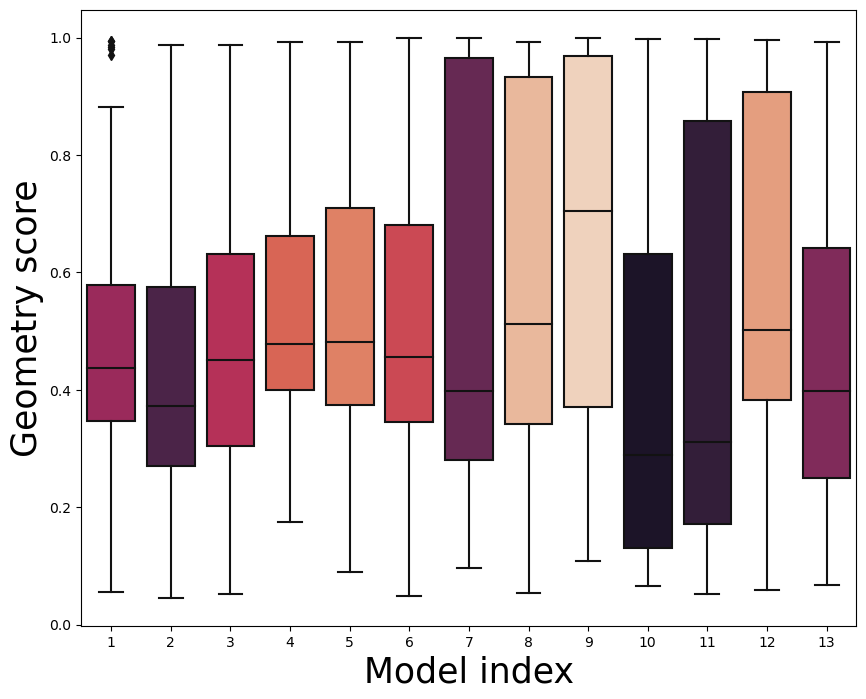

In [11]:
def compare_perfomance(data_g, fontsize, figsize):
    scores = data_g[:,-1]
    models = data_g[:,1].astype(int)
    # creating color palette
    pal = sns.color_palette("rocket",n_colors=np.unique(models).shape[0])
    pal = pal.as_hex()

    colors = []
    score_models = []
    for model in np.unique(models):
        score_model = np.median(scores[np.where(models==model)[0]])
        score_models.append(score_model)

    score_models = np.array(score_models)
    idxs_sort = np.argsort(score_models)
    colors = []
    for i in range(len(idxs_sort)):
        colors.append(pal[np.where(idxs_sort==i)[0][0]])
        
    fig = plt.figure(frameon=False,figsize=figsize)
    plt.xlabel('Model index',fontsize=fontsize)
    plt.ylabel('Geometry score',fontsize=fontsize)
    g = sns.boxplot(x=models,y=scores,palette=colors)
    plt.show()

dimension = '2'
origin = '-g'
score = 'isotropy'
simmetry = 'p4m'
extension = 'svg'
fontsize = 25
figsize = (10,8)

score_g = 'D:/Lucas GAN/Dados/4- Mechanical_scores/GAN/%sD/%s/%s.csv' %(dimension,simmetry,score)
data_g = np.loadtxt(score_g,delimiter=',')
compare_perfomance(data_g,fontsize,figsize)
